In [1]:
# imports
import sys
sys.path.append( '../FIA' )
sys.path.append( '../ML' )
sys.path.append( '..' )

from helpers import *
from FIA import *
from ML4com import *
from DL4com import *

In [2]:
# Load matrices
strains = pd.read_csv("../../data/comm8_0/strains.tsv", sep="\t")
comm8 = pd.read_csv("../../data/comm8_0/comm8.tsv", sep="\t")
metData = pd.read_csv("../../data/comm8_0/metData.tsv", sep="\t")
metData.index = pd.read_csv("../../data/comm8_0/metName.tsv", sep="\t")

met_raw_pos = pd.read_excel("../../data/comm8_0/FIA-Data Com8_20230717_P0024_msAV206-312.xlsx", sheet_name="pos")
met_raw_neg = pd.read_excel("../../data/comm8_0/FIA-Data Com8_20230717_P0024_msAV206-312.xlsx", sheet_name="neg")
met_raw_comb = pd.concat( [total_ion_count_normalization( join_df_metNames(met_raw_pos) ),
                           total_ion_count_normalization( join_df_metNames(met_raw_neg) )] )

In [20]:
X = met_raw_comb.transpose()

In [78]:
from scipy.stats import ttest_ind, mannwhitneyu
from statsmodels.sandbox.stats.multicomp import multipletests

In [110]:
def test_metabolites_organism(X, community_composition, organism_idx, test):
    X_in = X[[True if i==1 else False for i in community_composition.iloc[:,organism_idx].values]]
    X_notin = X[[True if i==0 else False for i in community_composition.iloc[:,organism_idx].values]]
    statistic, p_values = test(X_in, X_notin)
    results = multipletests(p_values, alpha=0.0000001, method="bonferroni")
    return results

In [111]:
results = test_metabolites_organism(X, comm8, 0, mannwhitneyu)

In [125]:
X_in = X[[True if i==1 else False for i in comm8.iloc[:,0].values]]
X_notin = X[[True if i==0 else False for i in comm8.iloc[:,0].values]]

In [127]:
strains

,0
0,C. ramosum
1,R. gnavus
2,C. aerofaciens
3,B. thetaiotaomicron
4,B. uniformis
5,B. vulgatus
6,F. nucleatum
7,R. intestinalis


In [132]:
plot_df = pd.concat({"Included": X_in, "Not included":X_notin}).reset_index()
plot_df

metNames,level_0,level_1,Acetone[M+H]+\nPropanal[M+H],Aminoacetaldehyde[M+H]+\nAcetamide[M+H],Trimethylamine[M+H]+\nisopropylamine[M+H],Propyl alcohol[M+H]+\nIsopropyl alcohol[M+H],Furan[M+H],Isoprene[M+H],1-Pyrroline[M+H],Butanal[M+H]+\nisobutyraldehyde[M+H]+\nEthoxy ethene[M+H]+\nbutan-2-one[M+H],...,Chromomycin A2[M-H],Curvacin A[M-H],adenosylcob(III)inamide phosphate[M-H],Adenosyl cobinamide phosphate[M-H],CL(15:0cyclo/15:0cyclo/15:0cyclo/18:1(9Z))[M-H]-\nCL(15:0cyclo/15:0cyclo/16:1(9Z)/17:0cycw7c)[M-H]-\nCL(15:0cyclo/15:0cyclo/18:1(9Z)/15:0cyclo)[M-H]-\nCL(15:0cyclo/15:0cyclo/17:0cycw7c/16:1(9Z))[M-H]-\nCL(15:0cyclo/16:1(9Z)/15:0cyclo/17:0cycw7c)[M-H]-\nCL(15:0cyclo/16:1(9Z)/16:1(9Z)/16:1(9Z))[M-H]-\nCL(15:0cyclo/16:1(9Z)/17:0cycw7c/15:0cyclo)[M-H]-\nCL(16:1(9Z)/15:0cyclo/15:0cyclo/17:0cycw7c)[M-H]-\nCL(16:1(9Z)/15:0cyclo/16:1(9Z)/16:1(9Z))[M-H]-\nCL(16:1(9Z)/15:0cyclo/17:0cycw7c/15:0cyclo)[M-H],Co-methyl-Co-5-hydroxybenzimidazolylcob(III)amide[M-H],Cyanocobalamin[M-H],coenzyme B12[M-H]-\nAdenosylcobalamin[M-H],adenosylcob(III)alamin 5'-phosphate[M-H],Adenosylcobalamin 5'-phosphate[M-H]
0,Included,MS1,0.000092,0.000671,0.000117,0.000524,0.000062,0.000051,0.001007,0.000034,...,0.000120,0.000097,0.000123,0.000100,0.000047,0.000105,0.000094,0.000084,0.000062,0.000077
1,Included,MS9,0.000076,0.000651,0.000193,0.000704,0.000046,0.000048,0.001029,0.000059,...,0.000110,0.000122,0.000092,0.000115,0.000058,0.000106,0.000101,0.000091,0.000087,0.000086
2,Included,MS10,0.000098,0.000625,0.000164,0.000753,0.000064,0.000040,0.001037,0.000030,...,0.000108,0.000106,0.000110,0.000108,0.000053,0.000089,0.000095,0.000077,0.000062,0.000057
3,Included,MS11,0.000098,0.000629,0.000163,0.000734,0.000049,0.000053,0.001078,0.000034,...,0.000111,0.000106,0.000111,0.000099,0.000056,0.000106,0.000085,0.000070,0.000070,0.000076
4,Included,MS12,0.000125,0.000589,0.000178,0.000502,0.000089,0.000048,0.001018,0.000054,...,0.000119,0.000088,0.000102,0.000090,0.000050,0.000114,0.000091,0.000074,0.000051,0.000084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Not included,MS57,0.000078,0.000622,0.000222,0.000599,0.000052,0.000031,0.001115,0.000047,...,0.000162,0.000131,0.000120,0.000137,0.000053,0.000109,0.000121,0.000101,0.000075,0.000084
64,Not included,MS58,0.000087,0.000606,0.000135,0.000631,0.000054,0.000043,0.001252,0.000055,...,0.000126,0.000121,0.000115,0.000126,0.000065,0.000121,0.000110,0.000095,0.000090,0.000089
65,Not included,MS59,0.000056,0.000713,0.000174,0.000649,0.000057,0.000037,0.001227,0.000043,...,0.000133,0.000135,0.000124,0.000104,0.000053,0.000118,0.000125,0.000105,0.000109,0.000105
66,Not included,MS60,0.000061,0.000581,0.000190,0.000616,0.000057,0.000055,0.001192,0.000045,...,0.000132,0.000127,0.000117,0.000087,0.000055,0.000120,0.000110,0.000106,0.000107,0.000093


In [134]:
sns.boxplotx=X_in.loc[:,results[0]], data=plot_df, hue="level_0" palette="PRGn")

ValueError: The following variable cannot be assigned with wide-form data: `hue`

In [ ]:

# statistical annotation
x1, x2 = 2, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = tips['total_bill'].max() + 2, 2, 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

plt.show()

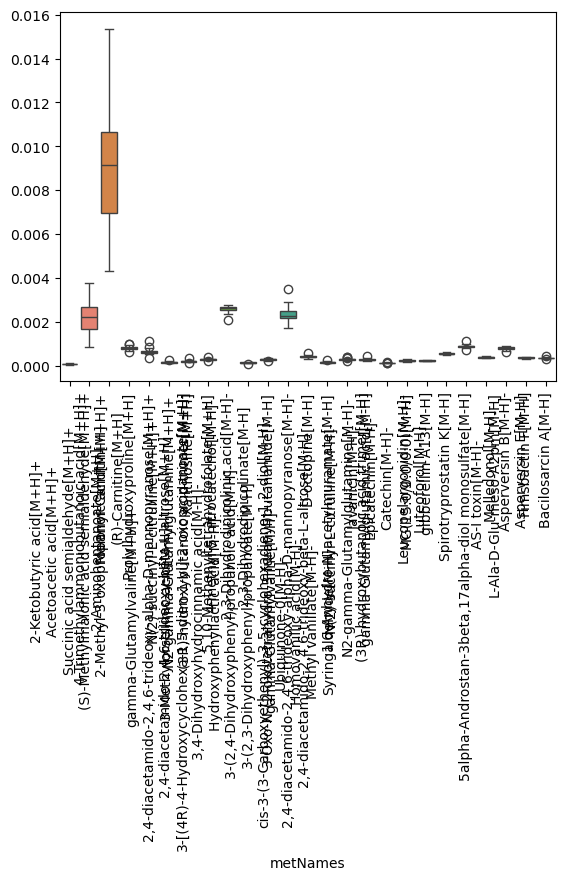

In [122]:
ax = sns.boxplot(X_in.loc[:,results[0]])
ax.tick_params(axis='x', rotation=90)
plt.show()

metNames,Acetone[M+H]+\nPropanal[M+H],Aminoacetaldehyde[M+H]+\nAcetamide[M+H],Trimethylamine[M+H]+\nisopropylamine[M+H],Propyl alcohol[M+H]+\nIsopropyl alcohol[M+H],Furan[M+H],Isoprene[M+H],1-Pyrroline[M+H],Butanal[M+H]+\nisobutyraldehyde[M+H]+\nEthoxy ethene[M+H]+\nbutan-2-one[M+H],2-iminoacetate[M+H],"3-Aminopropionaldehyde[M+H]+\nAminoacetone[M+H]+\nN,N-dimethylformamide[M+H]",...,Chromomycin A2[M-H],Curvacin A[M-H],adenosylcob(III)inamide phosphate[M-H],Adenosyl cobinamide phosphate[M-H],CL(15:0cyclo/15:0cyclo/15:0cyclo/18:1(9Z))[M-H]-\nCL(15:0cyclo/15:0cyclo/16:1(9Z)/17:0cycw7c)[M-H]-\nCL(15:0cyclo/15:0cyclo/18:1(9Z)/15:0cyclo)[M-H]-\nCL(15:0cyclo/15:0cyclo/17:0cycw7c/16:1(9Z))[M-H]-\nCL(15:0cyclo/16:1(9Z)/15:0cyclo/17:0cycw7c)[M-H]-\nCL(15:0cyclo/16:1(9Z)/16:1(9Z)/16:1(9Z))[M-H]-\nCL(15:0cyclo/16:1(9Z)/17:0cycw7c/15:0cyclo)[M-H]-\nCL(16:1(9Z)/15:0cyclo/15:0cyclo/17:0cycw7c)[M-H]-\nCL(16:1(9Z)/15:0cyclo/16:1(9Z)/16:1(9Z))[M-H]-\nCL(16:1(9Z)/15:0cyclo/17:0cycw7c/15:0cyclo)[M-H],Co-methyl-Co-5-hydroxybenzimidazolylcob(III)amide[M-H],Cyanocobalamin[M-H],coenzyme B12[M-H]-\nAdenosylcobalamin[M-H],adenosylcob(III)alamin 5'-phosphate[M-H],Adenosylcobalamin 5'-phosphate[M-H]
MS1,0.000092,0.000671,0.000117,0.000524,0.000062,0.000051,0.001007,0.000034,0.000176,0.000480,...,0.000120,0.000097,0.000123,0.000100,0.000047,0.000105,0.000094,0.000084,0.000062,0.000077
MS9,0.000076,0.000651,0.000193,0.000704,0.000046,0.000048,0.001029,0.000059,0.000172,0.000482,...,0.000110,0.000122,0.000092,0.000115,0.000058,0.000106,0.000101,0.000091,0.000087,0.000086
MS10,0.000098,0.000625,0.000164,0.000753,0.000064,0.000040,0.001037,0.000030,0.000201,0.000486,...,0.000108,0.000106,0.000110,0.000108,0.000053,0.000089,0.000095,0.000077,0.000062,0.000057
MS11,0.000098,0.000629,0.000163,0.000734,0.000049,0.000053,0.001078,0.000034,0.000133,0.000527,...,0.000111,0.000106,0.000111,0.000099,0.000056,0.000106,0.000085,0.000070,0.000070,0.000076
MS12,0.000125,0.000589,0.000178,0.000502,0.000089,0.000048,0.001018,0.000054,0.000147,0.000568,...,0.000119,0.000088,0.000102,0.000090,0.000050,0.000114,0.000091,0.000074,0.000051,0.000084
MS14,0.000082,0.000668,0.000189,0.000648,0.000051,0.000053,0.001064,0.000024,0.000175,0.000481,...,0.000108,0.000106,0.000088,0.000091,0.000050,0.000110,0.000105,0.000080,0.000056,0.000093
MS15,0.000072,0.000606,0.000163,0.000773,0.000060,0.000042,0.001017,0.000035,0.000161,0.000557,...,0.000125,0.000099,0.000084,0.000090,0.000062,0.000121,0.000088,0.000081,0.000065,0.000077
MS16,0.000088,0.000619,0.000189,0.000802,0.000057,0.000044,0.001080,0.000050,0.000181,0.000496,...,0.000139,0.000104,0.000087,0.000095,0.000058,0.000108,0.000079,0.000085,0.000084,0.000084
MS17,0.000107,0.000634,0.000208,0.000626,0.000047,0.000050,0.001029,0.000037,0.000167,0.000493,...,0.000123,0.000115,0.000126,0.000120,0.000078,0.000109,0.000116,0.000080,0.000071,0.000075
MS19,0.000089,0.000427,0.000154,0.000476,0.000045,0.000056,0.000935,0.000063,0.000110,0.000393,...,0.000100,0.000114,0.000122,0.000109,0.000097,0.000120,0.000090,0.000099,0.000087,0.000119


metNames,Acetone[M+H]+\nPropanal[M+H],Aminoacetaldehyde[M+H]+\nAcetamide[M+H],Trimethylamine[M+H]+\nisopropylamine[M+H],Propyl alcohol[M+H]+\nIsopropyl alcohol[M+H],Furan[M+H],Isoprene[M+H],1-Pyrroline[M+H],Butanal[M+H]+\nisobutyraldehyde[M+H]+\nEthoxy ethene[M+H]+\nbutan-2-one[M+H],2-iminoacetate[M+H],"3-Aminopropionaldehyde[M+H]+\nAminoacetone[M+H]+\nN,N-dimethylformamide[M+H]",...,Chromomycin A2[M-H],Curvacin A[M-H],adenosylcob(III)inamide phosphate[M-H],Adenosyl cobinamide phosphate[M-H],CL(15:0cyclo/15:0cyclo/15:0cyclo/18:1(9Z))[M-H]-\nCL(15:0cyclo/15:0cyclo/16:1(9Z)/17:0cycw7c)[M-H]-\nCL(15:0cyclo/15:0cyclo/18:1(9Z)/15:0cyclo)[M-H]-\nCL(15:0cyclo/15:0cyclo/17:0cycw7c/16:1(9Z))[M-H]-\nCL(15:0cyclo/16:1(9Z)/15:0cyclo/17:0cycw7c)[M-H]-\nCL(15:0cyclo/16:1(9Z)/16:1(9Z)/16:1(9Z))[M-H]-\nCL(15:0cyclo/16:1(9Z)/17:0cycw7c/15:0cyclo)[M-H]-\nCL(16:1(9Z)/15:0cyclo/15:0cyclo/17:0cycw7c)[M-H]-\nCL(16:1(9Z)/15:0cyclo/16:1(9Z)/16:1(9Z))[M-H]-\nCL(16:1(9Z)/15:0cyclo/17:0cycw7c/15:0cyclo)[M-H],Co-methyl-Co-5-hydroxybenzimidazolylcob(III)amide[M-H],Cyanocobalamin[M-H],coenzyme B12[M-H]-\nAdenosylcobalamin[M-H],adenosylcob(III)alamin 5'-phosphate[M-H],Adenosylcobalamin 5'-phosphate[M-H]
MS1,0.000092,0.000671,0.000117,0.000524,0.000062,0.000051,0.001007,0.000034,0.000176,0.000480,...,0.000120,0.000097,0.000123,0.000100,0.000047,0.000105,0.000094,0.000084,0.000062,0.000077
MS2,0.000089,0.000669,0.000166,0.000604,0.000093,0.000052,0.001001,0.000034,0.000160,0.000499,...,0.000118,0.000118,0.000119,0.000123,0.000069,0.000122,0.000114,0.000105,0.000105,0.000103
MS3,0.000057,0.000633,0.000130,0.000731,0.000058,0.000037,0.001943,0.000030,0.000137,0.000576,...,0.000123,0.000120,0.000116,0.000110,0.000077,0.000117,0.000095,0.000096,0.000110,0.000107
MS4,0.000089,0.000637,0.000115,0.000551,0.000052,0.000049,0.001186,0.000036,0.000127,0.000451,...,0.000108,0.000104,0.000147,0.000116,0.000060,0.000110,0.000109,0.000086,0.000073,0.000090
MS5,0.000065,0.000663,0.000160,0.000686,0.000056,0.000048,0.001052,0.000029,0.000140,0.000496,...,0.000115,0.000094,0.000129,0.000104,0.000080,0.000118,0.000093,0.000093,0.000072,0.000095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MS64,0.000058,0.000615,0.000125,0.000677,0.000051,0.000041,0.001284,0.000040,0.000155,0.000514,...,0.000122,0.000140,0.000138,0.000102,0.000062,0.000124,0.000126,0.000106,0.000095,0.000105
MS65,0.000076,0.000597,0.000147,0.000673,0.000048,0.000046,0.001208,0.000045,0.000140,0.000462,...,0.000157,0.000138,0.000105,0.000110,0.000085,0.000107,0.000128,0.000097,0.000113,0.000108
MS66,0.000073,0.000554,0.000201,0.000713,0.000058,0.000034,0.001260,0.000049,0.000117,0.000540,...,0.000129,0.000129,0.000111,0.000102,0.000089,0.000112,0.000121,0.000108,0.000104,0.000088
MS67,0.000060,0.000511,0.000219,0.000591,0.000047,0.000045,0.001021,0.000033,0.000131,0.000429,...,0.000105,0.000111,0.000118,0.000099,0.000057,0.000093,0.000117,0.000080,0.000073,0.000084
